In [2]:
import json
import pandas as pd
from collections import defaultdict
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
# # Download the WordNet corpus
# nltk.download('wordnet')


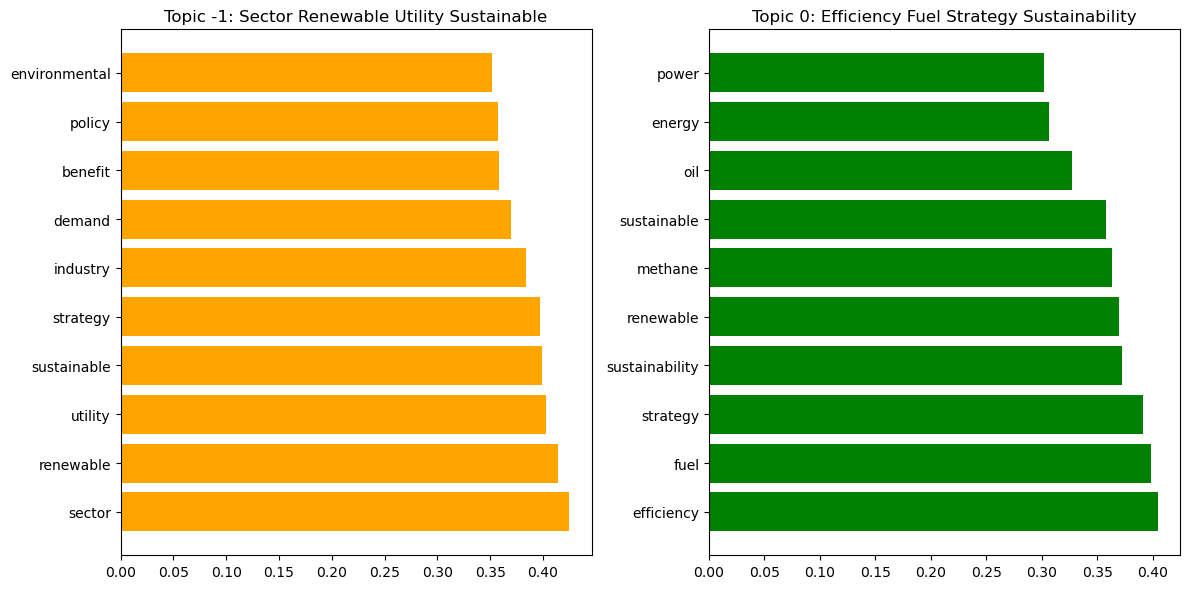

In [14]:
# Global Word topics

import numpy as np
from bertopic import BERTopic
import pickle
import matplotlib.pyplot as plt

# Load cleaned data
with open(r'C:\Users\hoath\Git\LobbyMap_ML\Embeddings\cleaned_data.pkl', 'rb') as f:
    cleaned_data = pickle.load(f)

# Load the precomputed embeddings
embeddings = np.load(r'C:\Users\hoath\Git\LobbyMap_ML\Embeddings\embeddings_GHG_clean.npy')

# Load the saved BERTopic model
topic_model = BERTopic.load(r"C:\Users\hoath\Git\LobbyMap_ML\Models\topic_model_GHG_clean.pkl")

# Make sure cleaned_data is a list of strings
if not isinstance(cleaned_data, list):
    cleaned_data = list(cleaned_data)


# Get the words and their scores for both topics
words_topic_minus_1, scores_topic_minus_1 = zip(*topic_model.get_topic(-1))
words_topic_0, scores_topic_0 = zip(*topic_model.get_topic(0))

# Create subplots for both topics
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot Topic -1
axs[0].barh(words_topic_minus_1, scores_topic_minus_1, color='orange')
axs[0].set_title('Topic -1: Sector Renewable Utility Sustainable')

# Plot Topic 0
axs[1].barh(words_topic_0, scores_topic_0, color='green')
axs[1].set_title('Topic 0: Efficiency Fuel Strategy Sustainability')

plt.tight_layout()
plt.show()



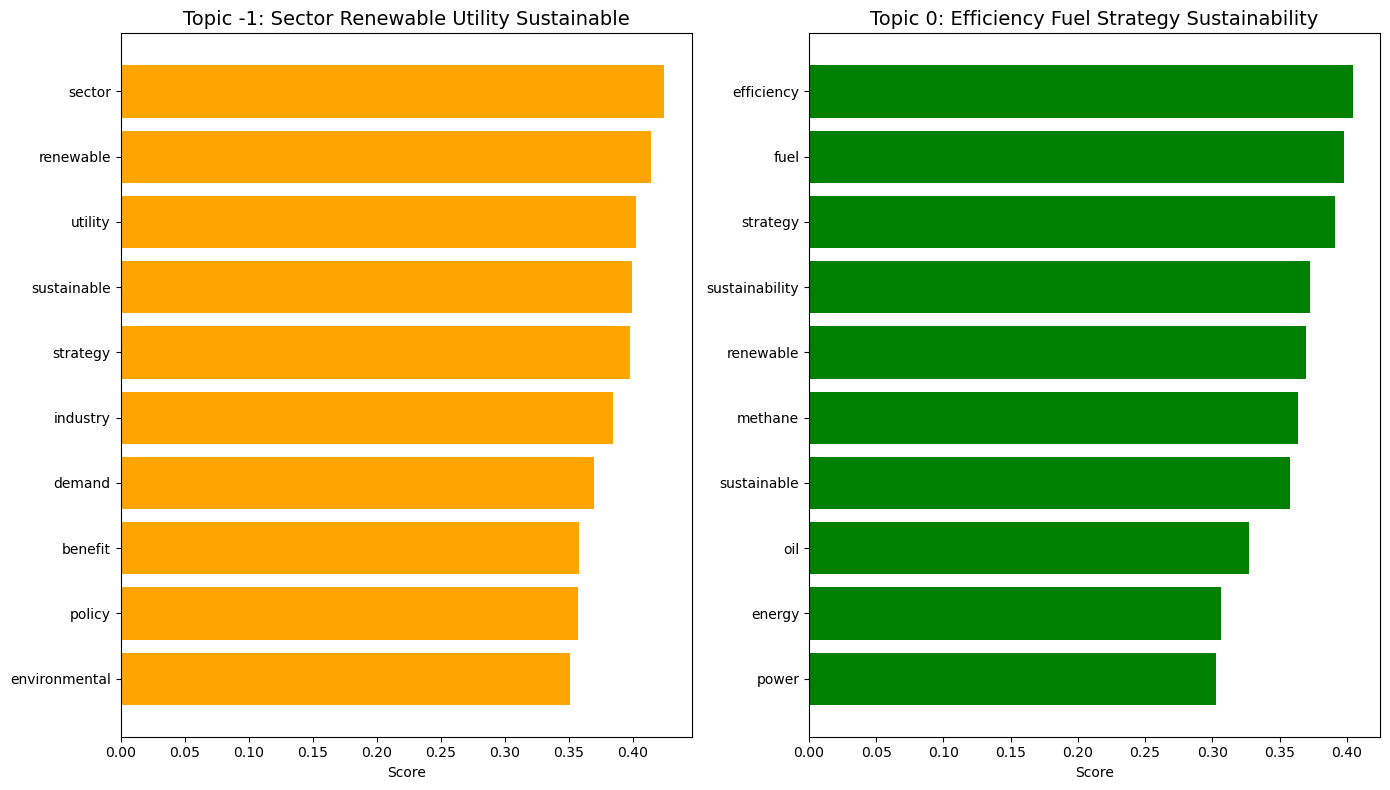

In [24]:
import matplotlib.pyplot as plt

# Define the number of words to display per topic
n_words = 15

# Get the words and their scores for both topics
words_topic_minus_1, scores_topic_minus_1 = zip(*topic_model.get_topic(-1)[:n_words])  # Display the top 15 words for Topic -1
words_topic_0, scores_topic_0 = zip(*topic_model.get_topic(0)[:n_words])  # Display the top 15 words for Topic 0

# Create subplots for both topics
fig, axs = plt.subplots(1, 2, figsize=(14, 8))  # Adjusted figsize for better readability

# Plot Topic -1
axs[0].barh(words_topic_minus_1, scores_topic_minus_1, color='orange')
axs[0].set_title('Topic -1: Sector Renewable Utility Sustainable', fontsize=14)
axs[0].invert_yaxis()  # To display the highest score at the top
axs[0].set_xlabel('Score')

# Plot Topic 0
axs[1].barh(words_topic_0, scores_topic_0, color='green')
axs[1].set_title('Topic 0: Efficiency Fuel Strategy Sustainability', fontsize=14)
axs[1].invert_yaxis()  # To display the highest score at the top
axs[1].set_xlabel('Score')

# Adjust layout for better readability
plt.tight_layout()
plt.show()


In [9]:
# Check the content of topic -1 and topic 0
print("Topic -1 Representation:", topic_model.get_topic(-1))
print("Topic 0 Representation:", topic_model.get_topic(0))


Topic -1 Representation: [('sector', 0.42470342), ('renewable', 0.41393808), ('utility', 0.40271193), ('sustainable', 0.39938015), ('strategy', 0.39748144), ('industry', 0.38425338), ('demand', 0.36970937), ('benefit', 0.35797435), ('policy', 0.3570973), ('environmental', 0.35124108)]
Topic 0 Representation: [('efficiency', 0.4044913), ('fuel', 0.3981399), ('strategy', 0.39144897), ('sustainability', 0.37240458), ('renewable', 0.36959416), ('methane', 0.36383808), ('sustainable', 0.35754535), ('oil', 0.3269153), ('energy', 0.3061837), ('power', 0.3023957)]


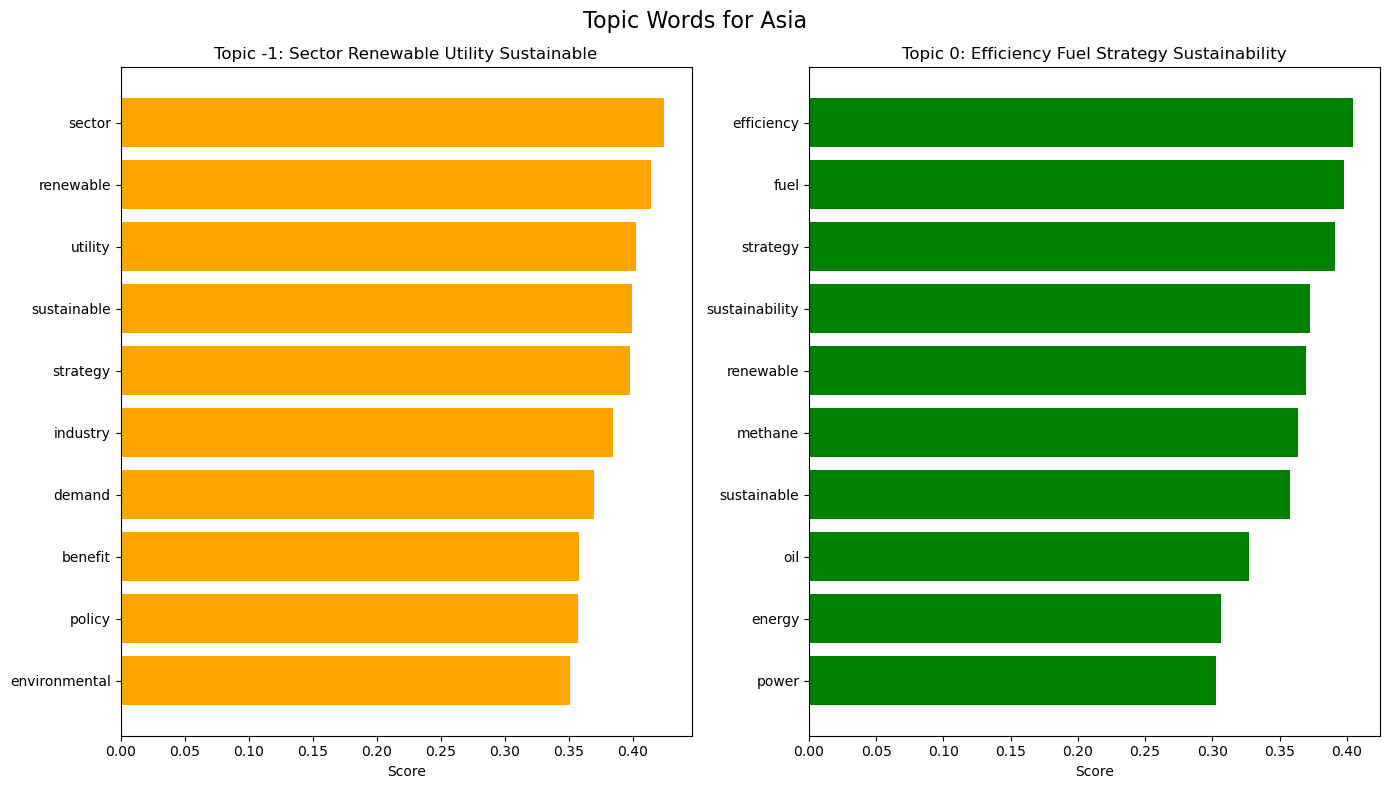

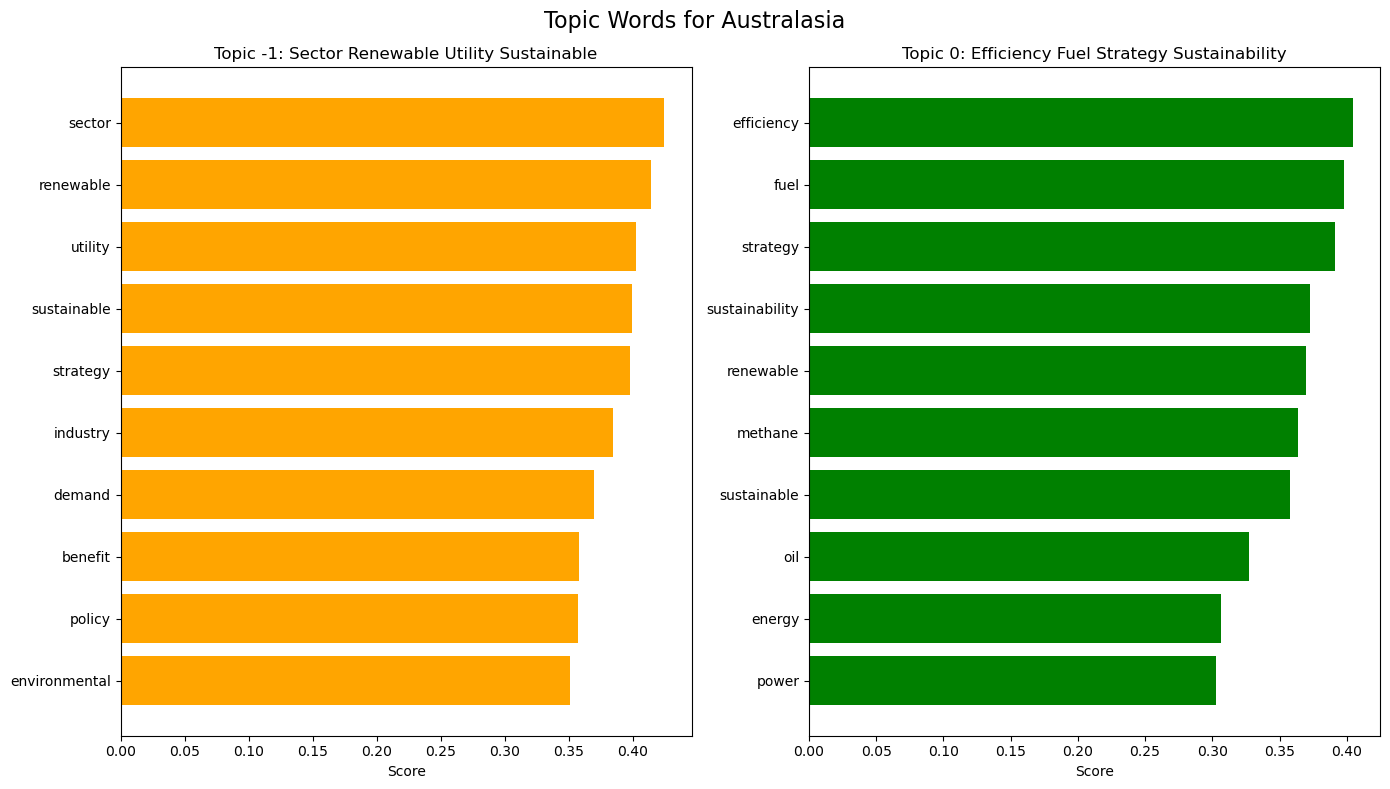

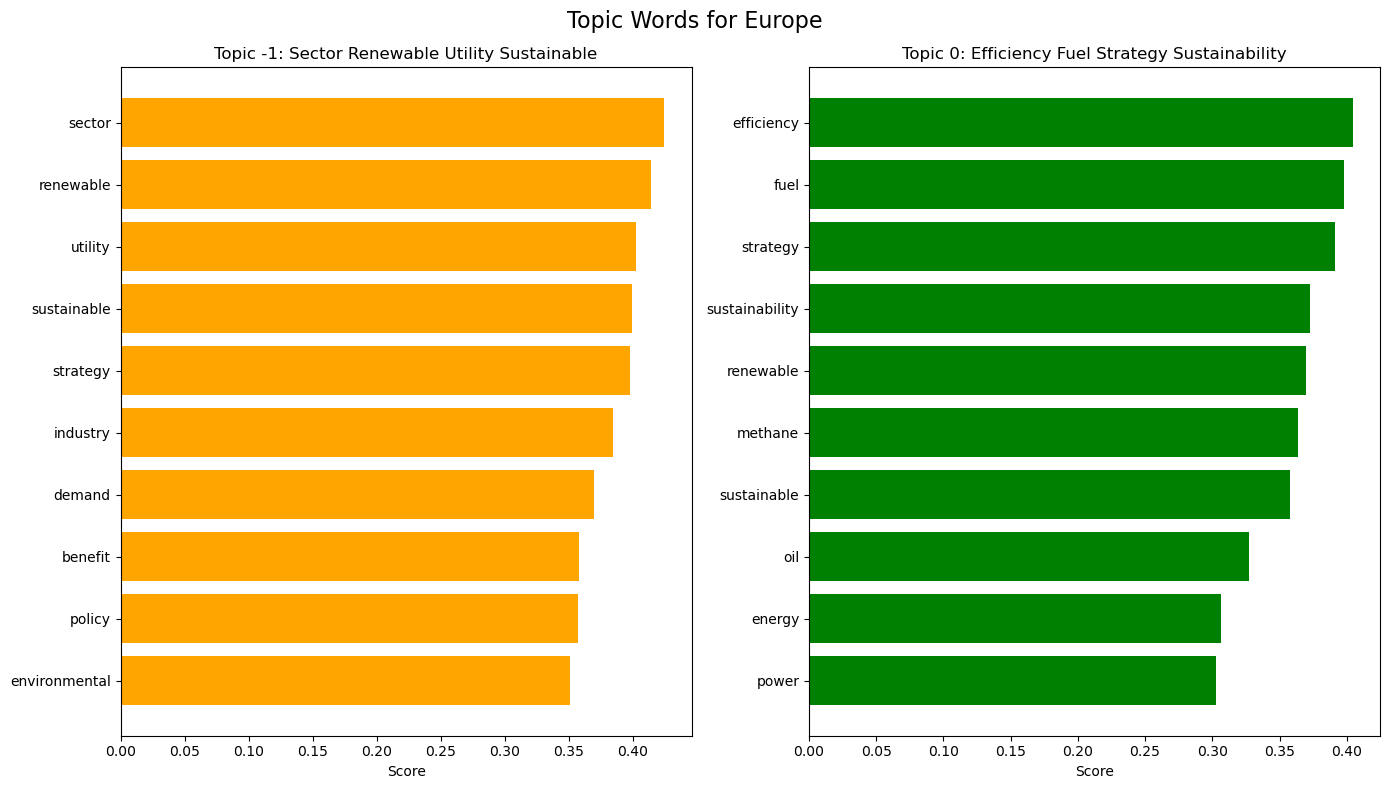

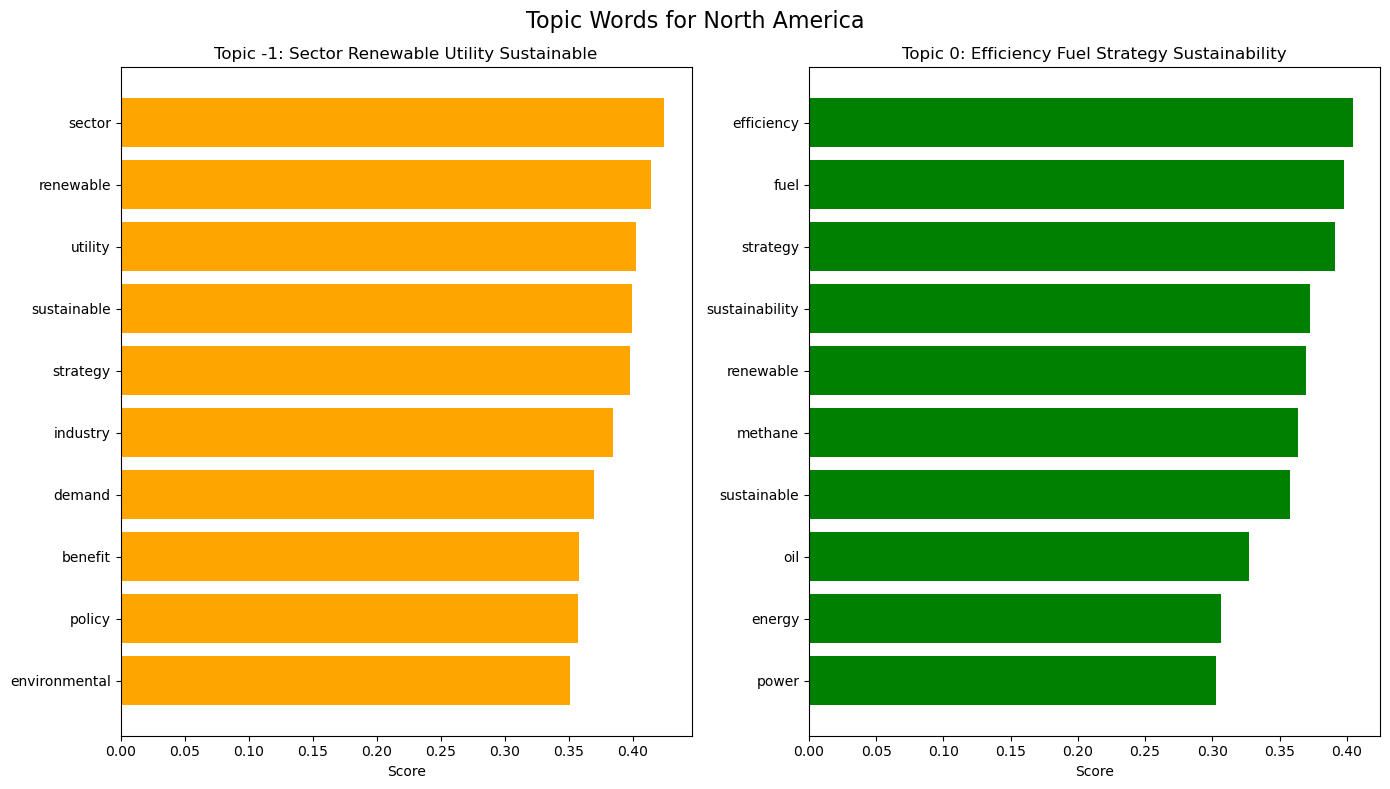

In [25]:
# Word topic by region
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from bertopic import BERTopic
import pickle

# Load cleaned data with metadata
with open(r'C:\Users\hoath\Git\LobbyMap_ML\Embeddings\cleaned_data_with_metadata.pkl', 'rb') as f:
    cleaned_data_with_metadata = pickle.load(f)

# Load the precomputed embeddings
embeddings = np.load(r'C:\Users\hoath\Git\LobbyMap_ML\Embeddings\embeddings_GHG_clean.npy')

# Load the saved BERTopic model
topic_model = BERTopic.load(r"C:\Users\hoath\Git\LobbyMap_ML\Models\topic_model_GHG_clean.pkl")

# Extract cleaned text and regions from cleaned_data_with_metadata
cleaned_data = [entry['text'] for entry in cleaned_data_with_metadata]
regions = [entry['region'] for entry in cleaned_data_with_metadata]  # Extract regions

# Analyze topic distributions by region (including Topic -1)
regions_of_interest = ['Asia', 'Australasia', 'Europe', 'North America']
n_words = 15  # Number of words to display per topic

# Iterate over each region of interest
for region in regions_of_interest:
    # Get the subset of text data and corresponding embeddings for the current region
    region_indices = [i for i, r in enumerate(regions) if r == region]
    
    if len(region_indices) > 0:  # Check that there is data for the region
        region_text_data = [cleaned_data[i] for i in region_indices]
        region_embeddings = embeddings[region_indices]  # Extract embeddings for the region

        # Assign topics to the region-specific data using the global model
        topics, probs = topic_model.transform(region_text_data, embeddings=region_embeddings)

        # No filtering of Topic -1, include all topics
        topic_distribution = Counter(topics)

        # Plot the top words for both Topic -1 and Topic 0 for the region
        fig, axs = plt.subplots(1, 2, figsize=(14, 8))
        fig.suptitle(f'Topic Words for {region}', fontsize=16)

        # Get the top words for Topic -1
        words_topic_minus_1, scores_topic_minus_1 = zip(*topic_model.get_topic(-1)[:n_words])
        axs[0].barh(words_topic_minus_1, scores_topic_minus_1, color='orange')
        axs[0].set_title('Topic -1: Sector Renewable Utility Sustainable')
        axs[0].invert_yaxis()  # Invert y-axis to have the highest score at the top
        axs[0].set_xlabel('Score')

        # Get the top words for Topic 0
        words_topic_0, scores_topic_0 = zip(*topic_model.get_topic(0)[:n_words])
        axs[1].barh(words_topic_0, scores_topic_0, color='green')
        axs[1].set_title('Topic 0: Efficiency Fuel Strategy Sustainability')
        axs[1].invert_yaxis()  # Invert y-axis to have the highest score at the top
        axs[1].set_xlabel('Score')

        # Display the plot for this region
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data available for region: {region}")


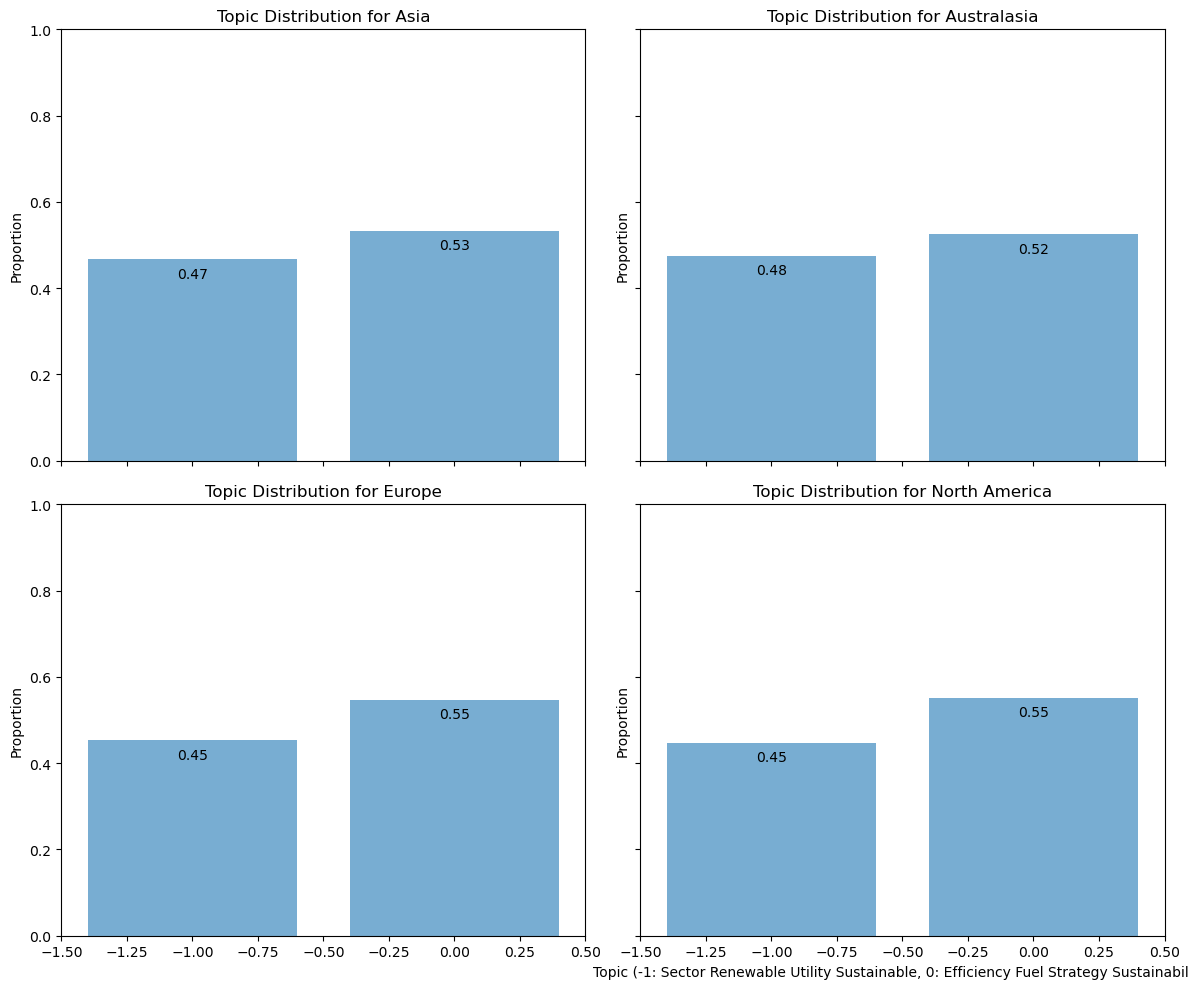

In [36]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from bertopic import BERTopic
import pickle

# Load cleaned data with metadata
with open(r'C:\Users\hoath\Git\LobbyMap_ML\Embeddings\cleaned_data_with_metadata.pkl', 'rb') as f:
    cleaned_data_with_metadata = pickle.load(f)

# Load the precomputed embeddings
embeddings = np.load(r'C:\Users\hoath\Git\LobbyMap_ML\Embeddings\embeddings_GHG_clean.npy')

# Load the saved BERTopic model
topic_model = BERTopic.load(r"C:\Users\hoath\Git\LobbyMap_ML\Models\topic_model_GHG_clean.pkl")

# Extract cleaned text and regions from cleaned_data_with_metadata
cleaned_data = [entry['text'] for entry in cleaned_data_with_metadata]
regions = [entry['region'] for entry in cleaned_data_with_metadata]  # Extract regions

# Analyze topic distributions by region (including Topic -1 and Topic 0)
regions_of_interest = ['Asia', 'Australasia', 'Europe', 'North America']
region_topic_distributions = {}

# Iterate over each region of interest
for region in regions_of_interest:
    # Get the subset of text data and corresponding embeddings for the current region
    region_indices = [i for i, r in enumerate(regions) if r == region]
    
    if len(region_indices) > 0:  # Check that there is data for the region
        region_text_data = [cleaned_data[i] for i in region_indices]
        region_embeddings = embeddings[region_indices]  # Extract embeddings for the region

        # Assign topics to the region-specific data using the global model
        topics, probs = topic_model.transform(region_text_data, embeddings=region_embeddings)

        # Focus on topics -1 and 0
        topic_distribution = Counter(topics)
        region_topic_distributions[region] = topic_distribution

# Plot normalized bar charts with annotations for each region
fig, axs = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)

# Set consistent axis limits for the two topics (-1 and 0)
xlim = (-1.5, 0.5)  # Topics: -1, 0
ylim = (0, 1)   # Proportions in linear scale

# Flatten axs array to easily index subplots
axs = axs.flatten()

for i, region in enumerate(regions_of_interest):
    # Extract topic distribution for the region
    topic_distribution = region_topic_distributions.get(region, {})
    total_documents = sum(topic_distribution.values())
    
    if total_documents > 0:
        # Calculate the proportion of documents assigned to each topic
        topic_proportions = {topic: count / total_documents for topic, count in topic_distribution.items()}

        # Filter for only topics -1 and 0
        topics_to_plot = [-1, 0]
        topic_proportions_filtered = {topic: topic_proportions.get(topic, 0) for topic in topics_to_plot}

        # Create a bar chart for the topic proportions (linear scale)
        bars = axs[i].bar(topic_proportions_filtered.keys(), topic_proportions_filtered.values(), alpha=0.6)

        # Add annotations to the bars
        for bar in bars:
            height = bar.get_height()
            axs[i].text(bar.get_x() + bar.get_width() / 2, height - 0.05, f'{height:.2f}', ha='center', va='bottom')

        axs[i].set_title(f"Topic Distribution for {region}")
        axs[i].set_xlim(xlim)
        axs[i].set_ylim(ylim)
        axs[i].set_ylabel("Proportion")

# Set x-axis label on the last subplot
axs[-1].set_xlabel('Topic (-1: Sector Renewable Utility Sustainable, 0: Efficiency Fuel Strategy Sustainability)')

# Display the plot
plt.tight_layout()
plt.show()


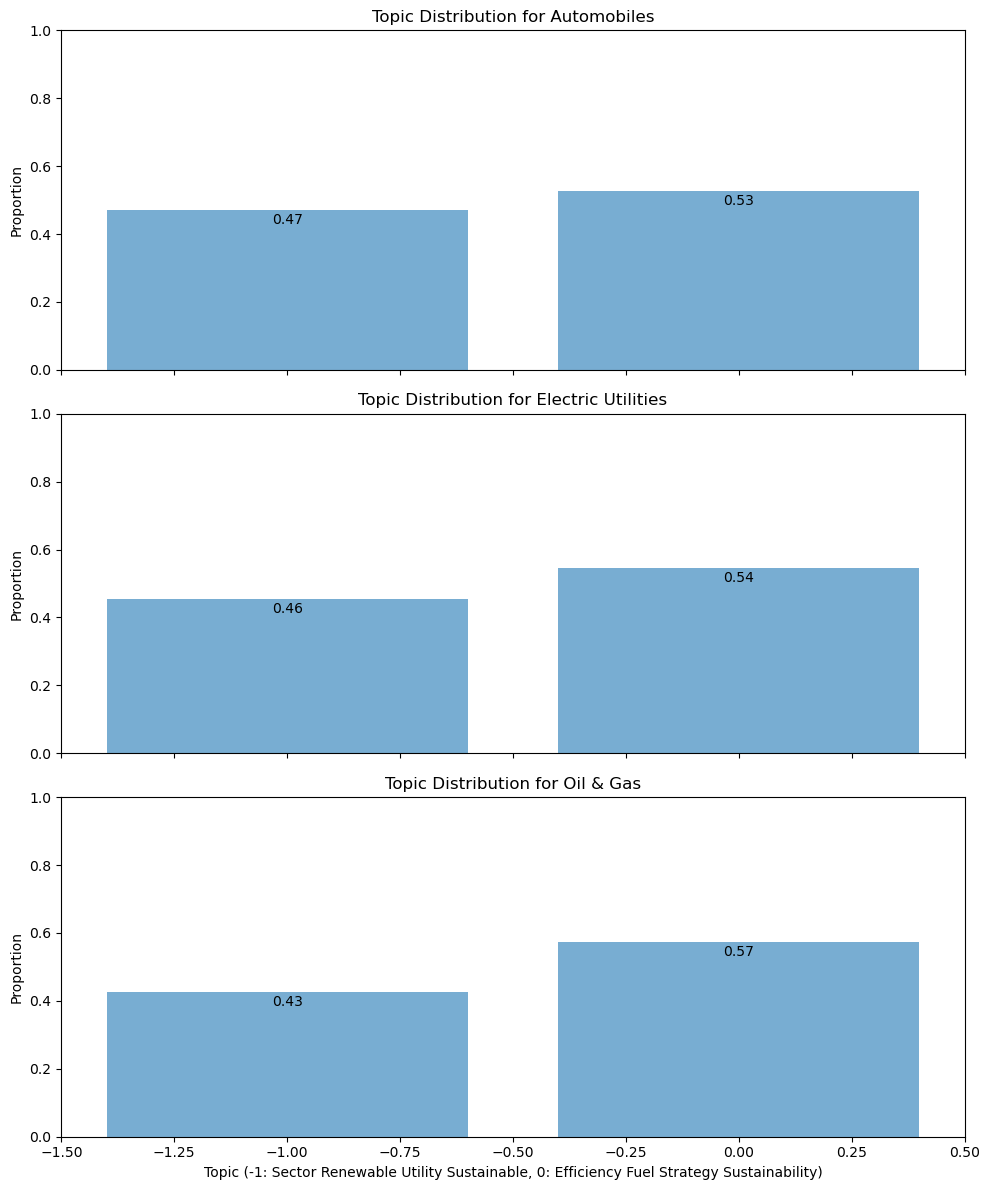

In [31]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from bertopic import BERTopic
import pickle

# Load cleaned data with metadata
with open(r'C:\Users\hoath\Git\LobbyMap_ML\Embeddings\cleaned_data_with_metadata.pkl', 'rb') as f:
    cleaned_data_with_metadata = pickle.load(f)

# Load the precomputed embeddings
embeddings = np.load(r'C:\Users\hoath\Git\LobbyMap_ML\Embeddings\embeddings_GHG_clean.npy')

# Load the saved BERTopic model
topic_model = BERTopic.load(r"C:\Users\hoath\Git\LobbyMap_ML\Models\topic_model_GHG_clean.pkl")

# Define sectors of interest
sectors_of_interest = ['Automobiles', 'Electric Utilities', 'Oil & Gas']

# Extract cleaned text, sectors, and regions from cleaned_data_with_metadata
cleaned_data = [entry['text'] for entry in cleaned_data_with_metadata]
sectors = [entry['sector'] for entry in cleaned_data_with_metadata]  # Extract sectors
regions = [entry['region'] for entry in cleaned_data_with_metadata]  # Extract regions

# Filter data based on sectors of interest
filtered_indices = [i for i, s in enumerate(sectors) if s in sectors_of_interest]
filtered_data = [cleaned_data[i] for i in filtered_indices]
filtered_embeddings = embeddings[filtered_indices]
filtered_sectors = [sectors[i] for i in filtered_indices]
filtered_regions = [regions[i] for i in filtered_indices]

# Analyze topic distributions by sector and region (for the filtered sectors)
sector_topic_distributions = {}

# Iterate over each sector of interest
for sector in sectors_of_interest:
    # Get the subset of text data and corresponding embeddings for the current sector
    sector_indices = [i for i, s in enumerate(filtered_sectors) if s == sector]
    
    if len(sector_indices) > 0:  # Check that there is data for the sector
        sector_text_data = [filtered_data[i] for i in sector_indices]
        sector_embeddings = filtered_embeddings[sector_indices]  # Extract embeddings for the sector

        # Assign topics to the sector-specific data using the global model
        topics, probs = topic_model.transform(sector_text_data, embeddings=sector_embeddings)

        # Focus on topics -1 and 0
        topic_distribution = Counter(topics)
        sector_topic_distributions[sector] = topic_distribution

# Plot normalized bar charts with annotations for each sector
fig, axs = plt.subplots(len(sectors_of_interest), 1, figsize=(10, 12), sharex=True, sharey=True)

# Set consistent axis limits for the two topics (-1 and 0)
xlim = (-1.5, 0.5)  # Topics: -1, 0
ylim = (0, 1)   # Proportions in linear scale

for i, sector in enumerate(sectors_of_interest):
    # Extract topic distribution for the sector
    topic_distribution = sector_topic_distributions.get(sector, {})
    total_documents = sum(topic_distribution.values())
    
    if total_documents > 0:
        # Calculate the proportion of documents assigned to each topic
        topic_proportions = {topic: count / total_documents for topic, count in topic_distribution.items()}

        # Filter for only topics -1 and 0
        topics_to_plot = [-1, 0]
        topic_proportions_filtered = {topic: topic_proportions.get(topic, 0) for topic in topics_to_plot}

        # Create a bar chart for the topic proportions (linear scale)
        bars = axs[i].bar(topic_proportions_filtered.keys(), topic_proportions_filtered.values(), alpha=0.6)

        # Add annotations to the bars
        for bar in bars:
            height = bar.get_height()
            axs[i].text(bar.get_x() + bar.get_width() / 2, height - 0.05, f'{height:.2f}', ha='center', va='bottom')

        axs[i].set_title(f"Topic Distribution for {sector}")
        axs[i].set_xlim(xlim)
        axs[i].set_ylim(ylim)
        axs[i].set_ylabel("Proportion")

# Set x-axis label on the last subplot
axs[-1].set_xlabel('Topic (-1: Sector Renewable Utility Sustainable, 0: Efficiency Fuel Strategy Sustainability)')

# Display the plot
plt.tight_layout()
plt.show()


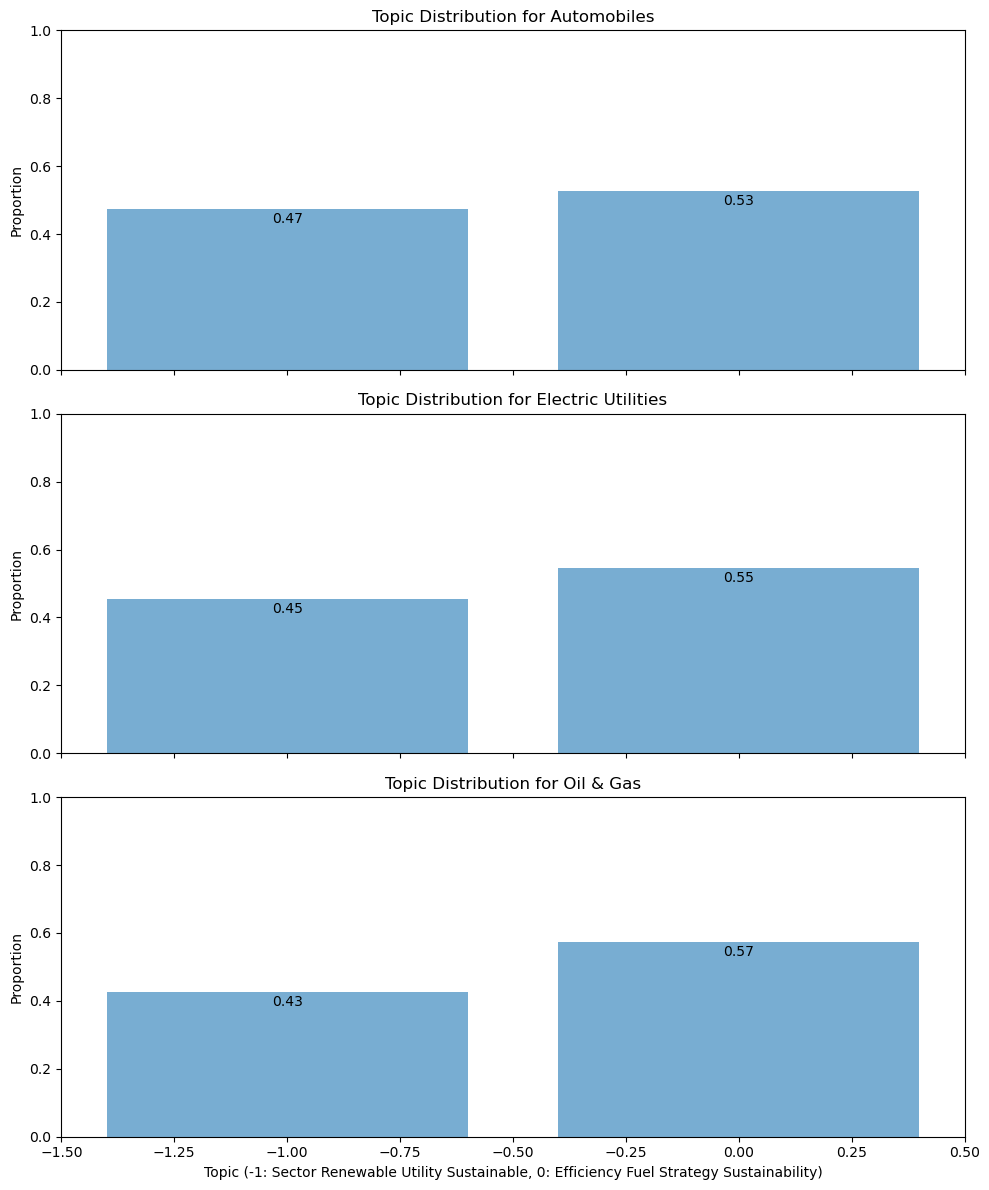

In [32]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from bertopic import BERTopic
import pickle

# Load cleaned data with metadata
with open(r'C:\Users\hoath\Git\LobbyMap_ML\Embeddings\cleaned_data_with_metadata.pkl', 'rb') as f:
    cleaned_data_with_metadata = pickle.load(f)

# Load the precomputed embeddings
embeddings = np.load(r'C:\Users\hoath\Git\LobbyMap_ML\Embeddings\embeddings_GHG_clean.npy')

# Load the saved BERTopic model
topic_model = BERTopic.load(r"C:\Users\hoath\Git\LobbyMap_ML\Models\topic_model_GHG_clean.pkl")

# Define sectors of interest
sectors_of_interest = ['Automobiles', 'Electric Utilities', 'Oil & Gas']

# Extract cleaned text, sectors, and regions from cleaned_data_with_metadata
cleaned_data = [entry['text'] for entry in cleaned_data_with_metadata]
sectors = [entry['sector'] for entry in cleaned_data_with_metadata]  # Extract sectors
regions = [entry['region'] for entry in cleaned_data_with_metadata]  # Extract regions

# Filter data based on sectors of interest
filtered_indices = [i for i, s in enumerate(sectors) if s in sectors_of_interest]
filtered_data = [cleaned_data[i] for i in filtered_indices]
filtered_embeddings = embeddings[filtered_indices]
filtered_sectors = [sectors[i] for i in filtered_indices]
filtered_regions = [regions[i] for i in filtered_indices]

# Analyze topic distributions by sector and region (for the filtered sectors)
sector_topic_distributions = {}

# Iterate over each sector of interest
for sector in sectors_of_interest:
    # Get the subset of text data and corresponding embeddings for the current sector
    sector_indices = [i for i, s in enumerate(filtered_sectors) if s == sector]
    
    if len(sector_indices) > 0:  # Check that there is data for the sector
        sector_text_data = [filtered_data[i] for i in sector_indices]
        sector_embeddings = filtered_embeddings[sector_indices]  # Extract embeddings for the sector

        # Assign topics to the sector-specific data using the global model
        topics, probs = topic_model.transform(sector_text_data, embeddings=sector_embeddings)

        # Focus on topics -1 and 0
        topic_distribution = Counter(topics)
        sector_topic_distributions[sector] = topic_distribution

# Plot normalized bar charts with annotations for each sector
fig, axs = plt.subplots(len(sectors_of_interest), 1, figsize=(10, 12), sharex=True, sharey=True)

# Set consistent axis limits for the two topics (-1 and 0)
xlim = (-1.5, 0.5)  # Topics: -1, 0
ylim = (0, 1)   # Proportions in linear scale

for i, sector in enumerate(sectors_of_interest):
    # Extract topic distribution for the sector
    topic_distribution = sector_topic_distributions.get(sector, {})
    total_documents = sum(topic_distribution.values())
    
    if total_documents > 0:
        # Calculate the proportion of documents assigned to each topic
        topic_proportions = {topic: count / total_documents for topic, count in topic_distribution.items()}

        # Filter for only topics -1 and 0
        topics_to_plot = [-1, 0]
        topic_proportions_filtered = {topic: topic_proportions.get(topic, 0) for topic in topics_to_plot}

        # Create a bar chart for the topic proportions (linear scale)
        bars = axs[i].bar(topic_proportions_filtered.keys(), topic_proportions_filtered.values(), alpha=0.6)

        # Add annotations to the bars
        for bar in bars:
            height = bar.get_height()
            axs[i].text(bar.get_x() + bar.get_width() / 2, height - 0.05, f'{height:.2f}', ha='center', va='bottom')

        axs[i].set_title(f"Topic Distribution for {sector}")
        axs[i].set_xlim(xlim)
        axs[i].set_ylim(ylim)
        axs[i].set_ylabel("Proportion")

# Set x-axis label on the last subplot
axs[-1].set_xlabel('Topic (-1: Sector Renewable Utility Sustainable, 0: Efficiency Fuel Strategy Sustainability)')

# Display the plot
plt.tight_layout()
plt.show()


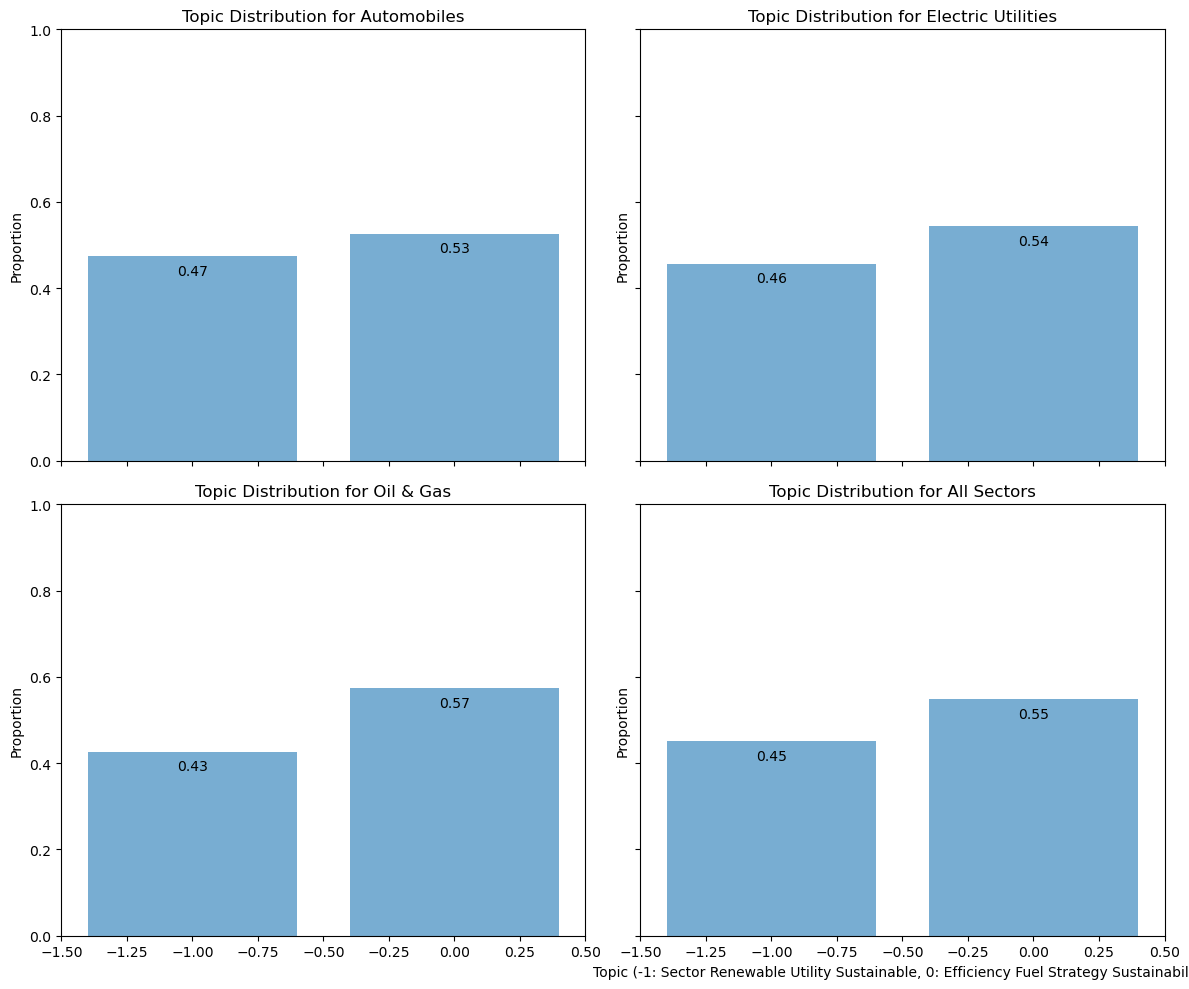

In [35]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from bertopic import BERTopic
import pickle

# Load cleaned data with metadata
with open(r'C:\Users\hoath\Git\LobbyMap_ML\Embeddings\cleaned_data_with_metadata.pkl', 'rb') as f:
    cleaned_data_with_metadata = pickle.load(f)

# Load the precomputed embeddings
embeddings = np.load(r'C:\Users\hoath\Git\LobbyMap_ML\Embeddings\embeddings_GHG_clean.npy')

# Load the saved BERTopic model
topic_model = BERTopic.load(r"C:\Users\hoath\Git\LobbyMap_ML\Models\topic_model_GHG_clean.pkl")

# Define sectors of interest
sectors_of_interest = ['Automobiles', 'Electric Utilities', 'Oil & Gas']

# Extract cleaned text, sectors, and regions from cleaned_data_with_metadata
cleaned_data = [entry['text'] for entry in cleaned_data_with_metadata]
sectors = [entry['sector'] for entry in cleaned_data_with_metadata]  # Extract sectors
regions = [entry['region'] for entry in cleaned_data_with_metadata]  # Extract regions

# Filter data based on sectors of interest
filtered_indices = [i for i, s in enumerate(sectors) if s in sectors_of_interest]
filtered_data = [cleaned_data[i] for i in filtered_indices]
filtered_embeddings = embeddings[filtered_indices]
filtered_sectors = [sectors[i] for i in filtered_indices]
filtered_regions = [regions[i] for i in filtered_indices]

# Analyze topic distributions by sector and region (for the filtered sectors)
sector_topic_distributions = {}

# Iterate over each sector of interest
for sector in sectors_of_interest:
    # Get the subset of text data and corresponding embeddings for the current sector
    sector_indices = [i for i, s in enumerate(filtered_sectors) if s == sector]
    
    if len(sector_indices) > 0:  # Check that there is data for the sector
        sector_text_data = [filtered_data[i] for i in sector_indices]
        sector_embeddings = filtered_embeddings[sector_indices]  # Extract embeddings for the sector

        # Assign topics to the sector-specific data using the global model
        topics, probs = topic_model.transform(sector_text_data, embeddings=sector_embeddings)

        # Focus on topics -1 and 0
        topic_distribution = Counter(topics)
        sector_topic_distributions[sector] = topic_distribution

# Aggregate data across all sectors
all_topics, all_probs = topic_model.transform(filtered_data, embeddings=filtered_embeddings)
all_sector_topic_distribution = Counter(all_topics)

# Plot normalized bar charts with annotations for each sector and all sectors combined
fig, axs = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)

# Set consistent axis limits for the two topics (-1 and 0)
xlim = (-1.5, 0.5)  # Topics: -1, 0
ylim = (0, 1)   # Proportions in linear scale

# Iterate over sectors and plot their distributions
for i, sector in enumerate(sectors_of_interest):
    row, col = divmod(i, 2)  # Arrange subplots in 2x2 grid
    topic_distribution = sector_topic_distributions.get(sector, {})
    total_documents = sum(topic_distribution.values())
    
    if total_documents > 0:
        # Calculate the proportion of documents assigned to each topic
        topic_proportions = {topic: count / total_documents for topic, count in topic_distribution.items()}
        
        # Filter for only topics -1 and 0
        topics_to_plot = [-1, 0]
        topic_proportions_filtered = {topic: topic_proportions.get(topic, 0) for topic in topics_to_plot}
        
        # Create a bar chart for the topic proportions (linear scale)
        bars = axs[row, col].bar(topic_proportions_filtered.keys(), topic_proportions_filtered.values(), alpha=0.6)
        
        # Add annotations to the bars
        for bar in bars:
            height = bar.get_height()
            axs[row, col].text(bar.get_x() + bar.get_width() / 2, height - 0.05, f'{height:.2f}', ha='center', va='bottom')
        
        axs[row, col].set_title(f"Topic Distribution for {sector}")
        axs[row, col].set_xlim(xlim)
        axs[row, col].set_ylim(ylim)
        axs[row, col].set_ylabel("Proportion")

# Plot aggregated distribution for all sectors
row, col = 1, 1  # The last subplot (second row, second column)
total_documents = sum(all_sector_topic_distribution.values())

if total_documents > 0:
    # Calculate the proportion of documents assigned to each topic
    all_topic_proportions = {topic: count / total_documents for topic, count in all_sector_topic_distribution.items()}

    # Filter for only topics -1 and 0
    all_topics_to_plot = [-1, 0]
    all_topic_proportions_filtered = {topic: all_topic_proportions.get(topic, 0) for topic in all_topics_to_plot}

    # Create a bar chart for the aggregated topic proportions (linear scale)
    bars = axs[row, col].bar(all_topic_proportions_filtered.keys(), all_topic_proportions_filtered.values(), alpha=0.6)

    # Add annotations to the bars
    for bar in bars:
        height = bar.get_height()
        axs[row, col].text(bar.get_x() + bar.get_width() / 2, height - 0.05, f'{height:.2f}', ha='center', va='bottom')

    axs[row, col].set_title("Topic Distribution for All Sectors")
    axs[row, col].set_xlim(xlim)
    axs[row, col].set_ylim(ylim)
    axs[row, col].set_ylabel("Proportion")

# Set x-axis label on the last subplot
axs[1, 1].set_xlabel('Topic (-1: Sector Renewable Utility Sustainable, 0: Efficiency Fuel Strategy Sustainability)')

# Display the plot
plt.tight_layout()
plt.show()


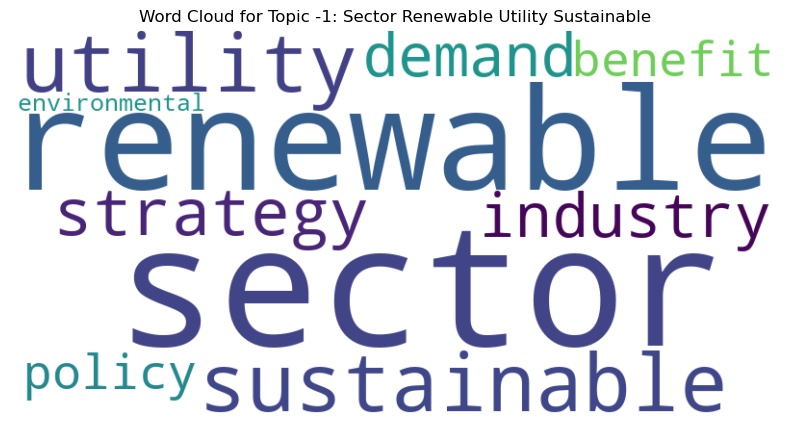

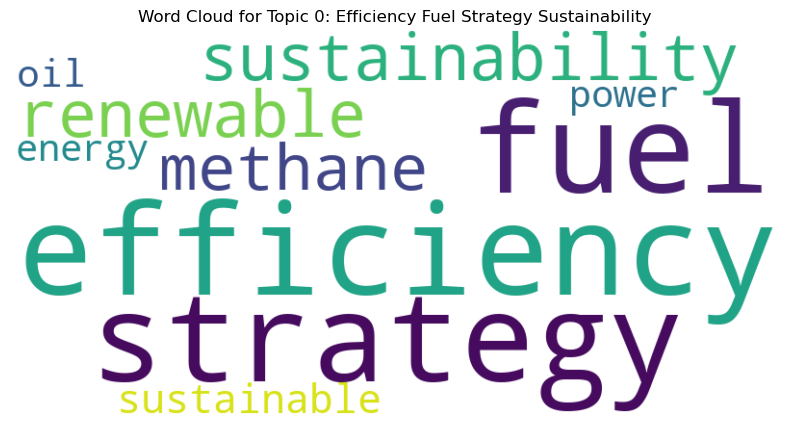

In [34]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from bertopic import BERTopic

# Load the BERTopic model
topic_model = BERTopic.load(r"C:\Users\hoath\Git\LobbyMap_ML\Models\topic_model_GHG_clean.pkl")

# Define the topics and their labels
topics_to_visualize = {
    -1: 'Sector Renewable Utility Sustainable',
    0: 'Efficiency Fuel Strategy Sustainability'
}

# Get the words and their frequencies for each topic
for topic, label in topics_to_visualize.items():
    words_and_weights = topic_model.get_topic(topic)  # Get top words for the topic
    
    if words_and_weights:
        # Prepare the word cloud data
        word_freq = {word: weight for word, weight in words_and_weights}

        # Generate the word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

        # Plot the word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"Word Cloud for Topic {topic}: {label}")
        plt.show()
    else:
        print(f"No words found for topic {topic}")


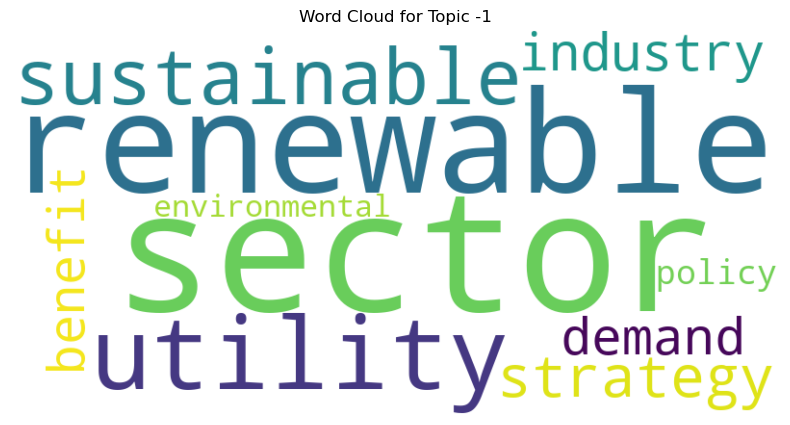

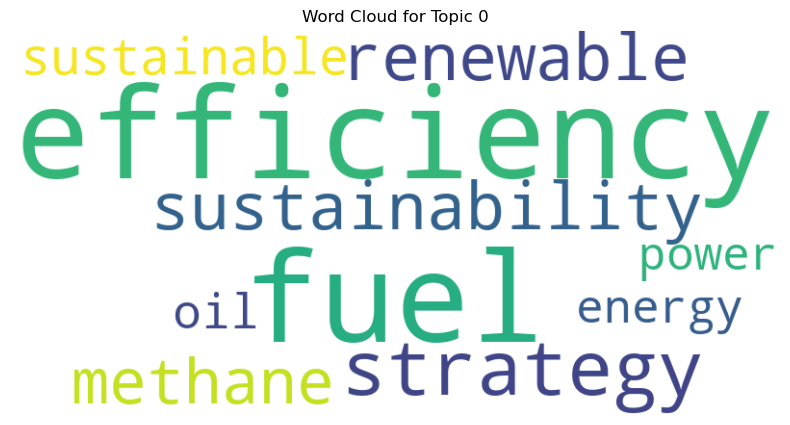

In [33]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from bertopic import BERTopic

# Load the BERTopic model
topic_model = BERTopic.load(r"C:\Users\hoath\Git\LobbyMap_ML\Models\topic_model_GHG_clean.pkl")

# Define the topics you want word clouds for
topics_to_visualize = [-1, 0]  # Topic -1: 'Sector Renewable Utility Sustainable', Topic 0: 'Efficiency Fuel Strategy Sustainability'

# Get the words and their frequencies for each topic
for topic in topics_to_visualize:
    words_and_weights = topic_model.get_topic(topic)  # Get top words for the topic
    
    if words_and_weights:
        # Prepare the word cloud data
        word_freq = {word: weight for word, weight in words_and_weights}

        # Generate the word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

        # Plot the word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"Word Cloud for Topic {topic}")
        plt.show()
    else:
        print(f"No words found for topic {topic}")


In [41]:
import matplotlib.pyplot as plt
import numpy as np
from bertopic import BERTopic
import pickle
import pandas as pd

# Load cleaned data with metadata
with open(r'C:\Users\hoath\Git\LobbyMap_ML\Embeddings\cleaned_data_with_metadata.pkl', 'rb') as f:
    cleaned_data_with_metadata = pickle.load(f)

# Load the precomputed embeddings
embeddings = np.load(r'C:\Users\hoath\Git\LobbyMap_ML\Embeddings\embeddings_GHG_clean.npy')

# Load the saved BERTopic model
topic_model = BERTopic.load(r"C:\Users\hoath\Git\LobbyMap_ML\Models\topic_model_GHG_clean.pkl")

# Extract cleaned text and metadata (including year)
cleaned_data = [entry['text'] for entry in cleaned_data_with_metadata]
years = [entry['year'] for entry in cleaned_data_with_metadata]  # Assuming 'year' is a field in metadata

# Filter the data for the years between 2013 and 2023
filtered_indices = [i for i, y in enumerate(years) if 2013 <= y <= 2023]
filtered_data = [cleaned_data[i] for i in filtered_indices]
filtered_years = [years[i] for i in filtered_indices]
filtered_embeddings = embeddings[filtered_indices]

# Convert the years to a pandas DataFrame to use in the analysis
df = pd.DataFrame({"Document": filtered_data, "Year": filtered_years})

# Assign topics to the filtered data using the global BERTopic model
topics, probs = topic_model.transform(filtered_data, embeddings=filtered_embeddings)

# Add topics to the DataFrame, ensuring topic -1 is included
df["Topic"] = topics

# Print to check how many documents have topic -1 and 0
print("Document distribution by topic:")
print(df["Topic"].value_counts())

# Check if both topics -1 and 0 exist
if -1 not in df["Topic"].unique():
    print("Warning: No documents classified under topic -1.")
if 0 not in df["Topic"].unique():
    print("Warning: No documents classified under topic 0.")

# Perform dynamic topic modeling over time (years 2013-2023)
topics_over_time = topic_model.topics_over_time(df["Document"].tolist(), df["Year"].tolist(), df["Topic"].tolist(), nr_bins=11)

# Force plotting of topics -1 and 0
fig = topic_model.visualize_topics_over_time(topics_over_time, topics=[-1, 0])

# Ensure plot shows
if fig:
    fig.show()
else:
    print("No plot generated.")


Document distribution by topic:
Topic
 0    180718
-1    138121
Name: count, dtype: int64


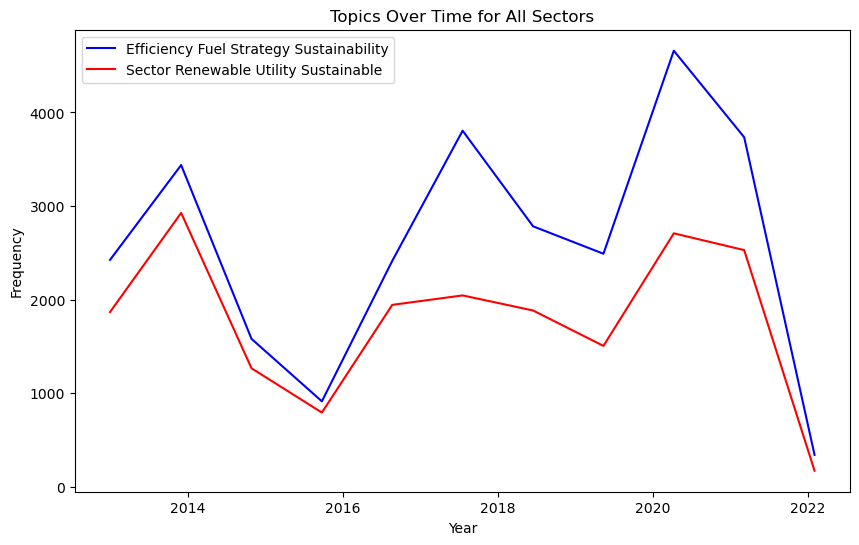

No valid data for Topics -1 and 0 for sector: Automobiles
No valid data for Topics -1 and 0 for sector: Electric Utilities
No valid data for Topics -1 and 0 for sector: Oil & Gas


In [59]:
# Define new labels for the topics
topic_labels = {
    -1: 'Sector Renewable Utility Sustainable',
    0: 'Efficiency Fuel Strategy Sustainability'
}

# Function to plot topics over time for any given sector
def plot_topics_for_sector(df, topics_over_time, sector_name="All Sectors"):
    # Filter the data for the sector
    if sector_name != "All Sectors":
        df_sector = df[df["Sector"] == sector_name]
        if df_sector.empty:
            print(f"No data available for sector: {sector_name}")
            return

        # Filter the topics_over_time based on the available years in the sector-specific dataframe
        filtered_years = df_sector["Year"].unique().tolist()
        df_topic_0 = topics_over_time[(topics_over_time["Topic"] == 0) & (topics_over_time["Timestamp"].isin(filtered_years))]
        df_topic_neg1 = topics_over_time[(topics_over_time["Topic"] == -1) & (topics_over_time["Timestamp"].isin(filtered_years))]
    else:
        # For all sectors, no need to filter by sector
        df_topic_0 = topics_over_time[topics_over_time["Topic"] == 0]
        df_topic_neg1 = topics_over_time[topics_over_time["Topic"] == -1]

    # Ensure there is data to plot for both topics
    if not df_topic_0.empty or not df_topic_neg1.empty:
        plt.figure(figsize=(10, 6))

        # Plot Topic 0 with the new label
        if not df_topic_0.empty:
            plt.plot(df_topic_0["Timestamp"], df_topic_0["Frequency"], label=topic_labels[0], color='blue')

        # Plot Topic -1 with the new label
        if not df_topic_neg1.empty:
            plt.plot(df_topic_neg1["Timestamp"], df_topic_neg1["Frequency"], label=topic_labels[-1], color='red')

        plt.xlabel("Year")
        plt.ylabel("Frequency")
        plt.title(f"Topics Over Time for {sector_name}")
        plt.legend()
        plt.show()
    else:
        print(f"No valid data for Topics -1 and 0 for sector: {sector_name}")

# Plot for all sectors
plot_topics_for_sector(df, topics_over_time, sector_name="All Sectors")

# Plot for each specific sector
sectors_of_interest = ['Automobiles', 'Electric Utilities', 'Oil & Gas']
for sector in sectors_of_interest:
    plot_topics_for_sector(df, topics_over_time, sector_name=sector)


In [60]:
for sector in sectors_of_interest:
    df_sector = df[df["Sector"] == sector]
    print(f"Data for sector {sector}:")
    print(df_sector.head())  # Print first few rows to inspect


Data for sector Automobiles:
                                               Document  Year       Sector  \
3436  electric digitalised mobility sustainable circ...  2022  Automobiles   
3437       economic performance ecological contribution  2022  Automobiles   
3438  demonstrated profitability transformation hand...  2022  Automobiles   
3439  electric mobility gathering pace delivery figu...  2022  Automobiles   
3440  time digital solution life convenient customer...  2022  Automobiles   

      Topic  
3436     -1  
3437      0  
3438     -1  
3439      0  
3440     -1  
Data for sector Electric Utilities:
                                      Document  Year              Sector  \
0                       comment class response  2022  Electric Utilities   
1  proposed standard performance reconstructed  2022  Electric Utilities   
2    modified source guideline existing source  2022  Electric Utilities   
3                    oil natural sector review  2022  Electric Utilities   
4 

In [61]:
print("Topics over time for the year 2022:")
print(topics_over_time[topics_over_time["Timestamp"] == 2022].head())


Topics over time for the year 2022:
Empty DataFrame
Columns: [Topic, Words, Frequency, Timestamp, Name]
Index: []


In [58]:
print(df.columns)


Index(['Document', 'Year', 'Sector', 'Topic'], dtype='object')


In [64]:
# Recalculate topics over time without specifying bins
topics_over_time = topic_model.topics_over_time(
    df["Document"].tolist(),  # Documents
    df["Year"].tolist(),      # Years (timestamps)
    df["Topic"].tolist()      # Assigned topics
)

# Check if 2022 is present after recalculating
print("Recalculated topics over time for 2022:")
print(topics_over_time[topics_over_time["Timestamp"] == 2022].head())


Recalculated topics over time for 2022:
    Topic                                              Words  Frequency  \
18     -1          fuel, engine, renewable, carbon, emission      19250   
19      0  sustainability, sustainable, strategy, innovat...      23519   

    Timestamp  
18       2022  
19       2022  


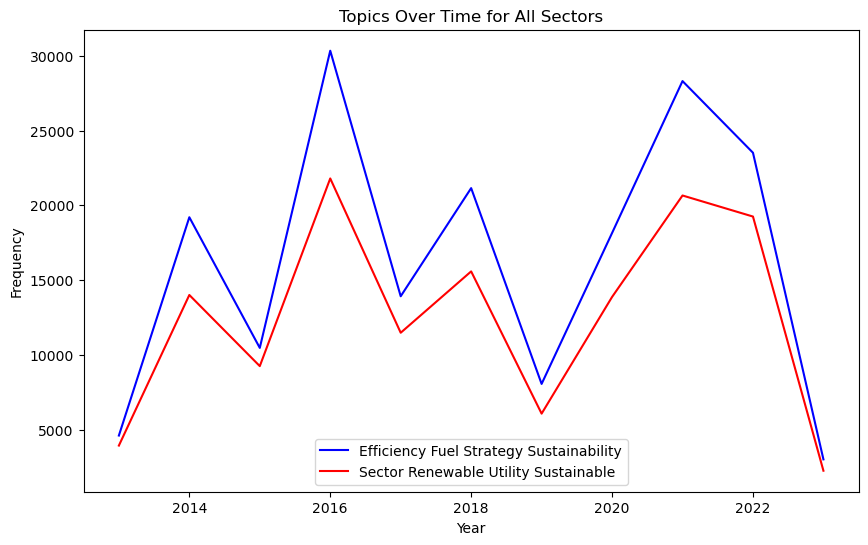

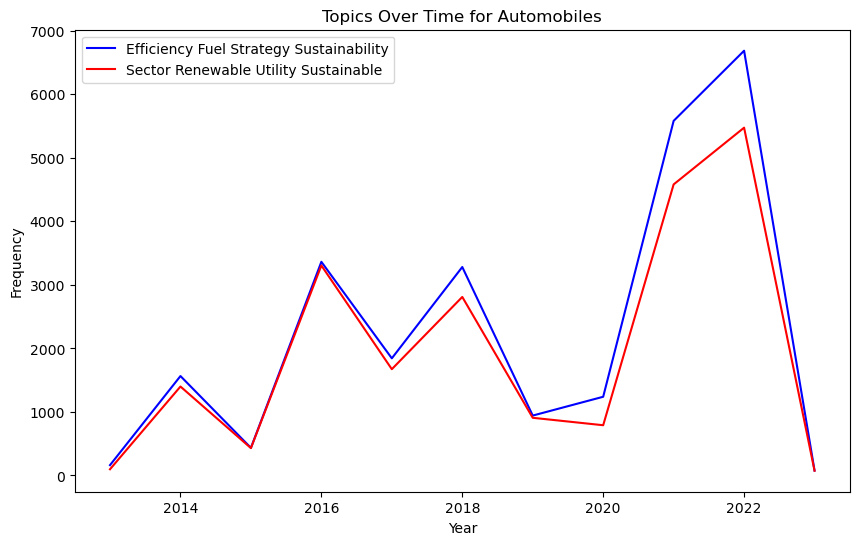

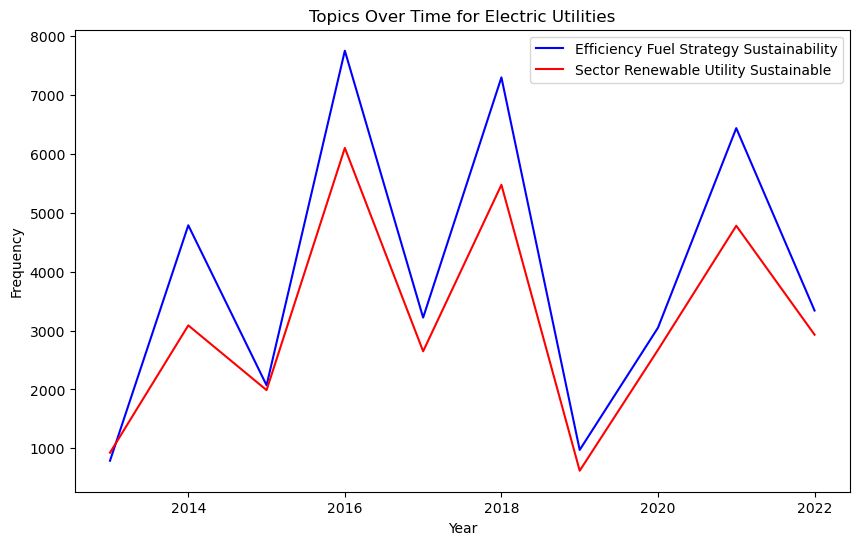

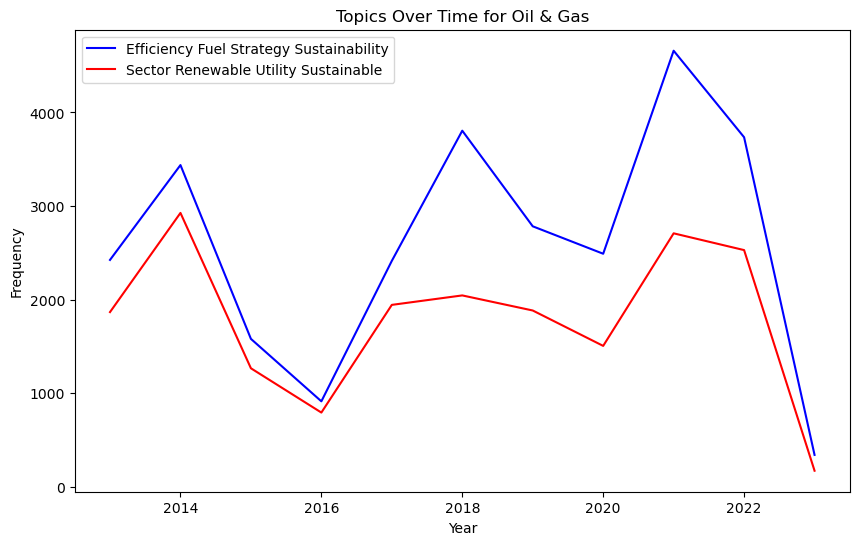

In [67]:
# Define new labels for the topics
topic_labels = {
    -1: 'Sector Renewable Utility Sustainable',
    0: 'Efficiency Fuel Strategy Sustainability'
}

# Function to recalculate and plot topics over time for each sector
def recalculate_and_plot_topics_for_sector(df, sector_name="All Sectors"):
    # Filter the data for the sector
    if sector_name != "All Sectors":
        df_sector = df[df["Sector"] == sector_name]
        if df_sector.empty:
            print(f"No data available for sector: {sector_name}")
            return
        
        # Recalculate topics_over_time specifically for this sector
        topics_over_time_sector = topic_model.topics_over_time(
            df_sector["Document"].tolist(),  # Sector-specific documents
            df_sector["Year"].tolist(),      # Sector-specific years (timestamps)
            df_sector["Topic"].tolist()      # Sector-specific topics
        )
    else:
        # Recalculate topics_over_time for all sectors combined
        topics_over_time_sector = topic_model.topics_over_time(
            df["Document"].tolist(),  # All documents
            df["Year"].tolist(),      # All years
            df["Topic"].tolist()      # All topics
        )

    # Ensure there is data to plot for both topics
    df_topic_0 = topics_over_time_sector[topics_over_time_sector["Topic"] == 0]
    df_topic_neg1 = topics_over_time_sector[topics_over_time_sector["Topic"] == -1]

    if not df_topic_0.empty or not df_topic_neg1.empty:
        plt.figure(figsize=(10, 6))

        # Plot Topic 0 with the new label
        if not df_topic_0.empty:
            plt.plot(df_topic_0["Timestamp"], df_topic_0["Frequency"], label=topic_labels[0], color='blue')

        # Plot Topic -1 with the new label
        if not df_topic_neg1.empty:
            plt.plot(df_topic_neg1["Timestamp"], df_topic_neg1["Frequency"], label=topic_labels[-1], color='red')

        plt.xlabel("Year")
        plt.ylabel("Frequency")
        plt.title(f"Topics Over Time for {sector_name}")
        plt.legend()
        plt.show()
    else:
        print(f"No valid data for Topics -1 and 0 for sector: {sector_name}")

# Plot for all sectors
recalculate_and_plot_topics_for_sector(df, sector_name="All Sectors")

# Plot for each specific sector
sectors_of_interest = ['Automobiles', 'Electric Utilities', 'Oil & Gas']
for sector in sectors_of_interest:
    recalculate_and_plot_topics_for_sector(df, sector_name=sector)


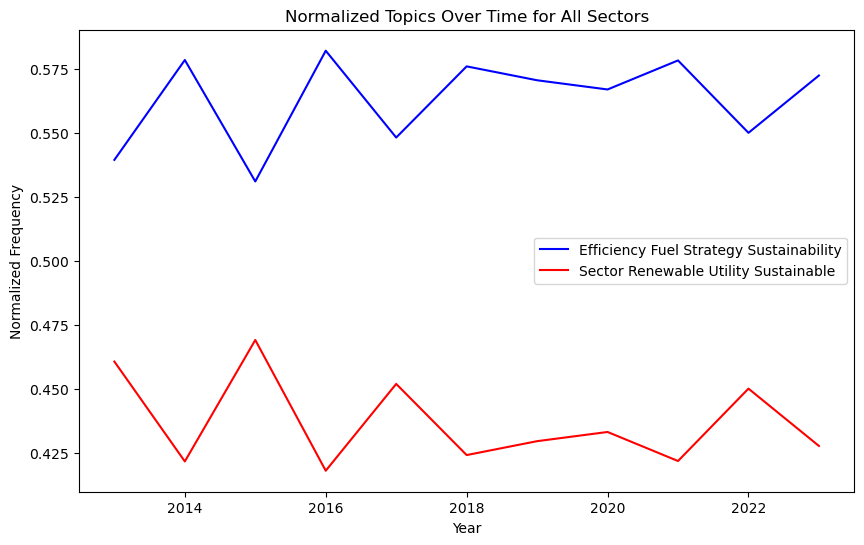

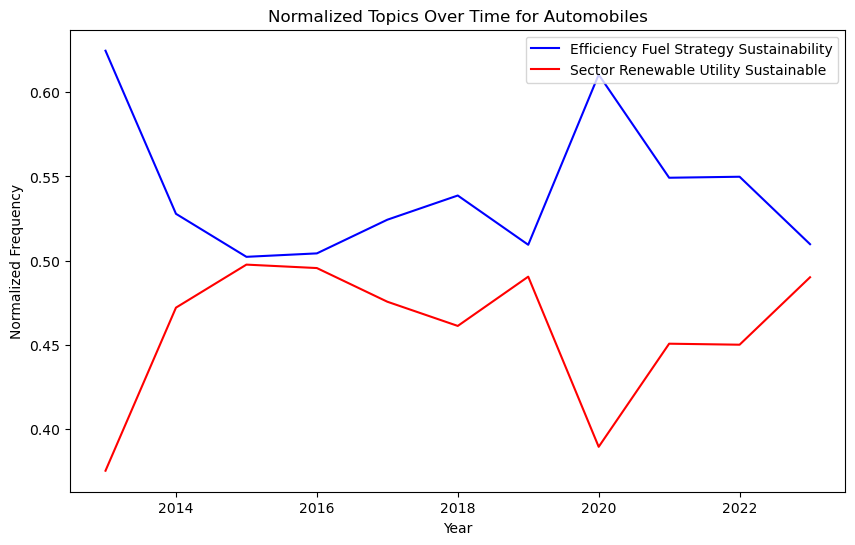

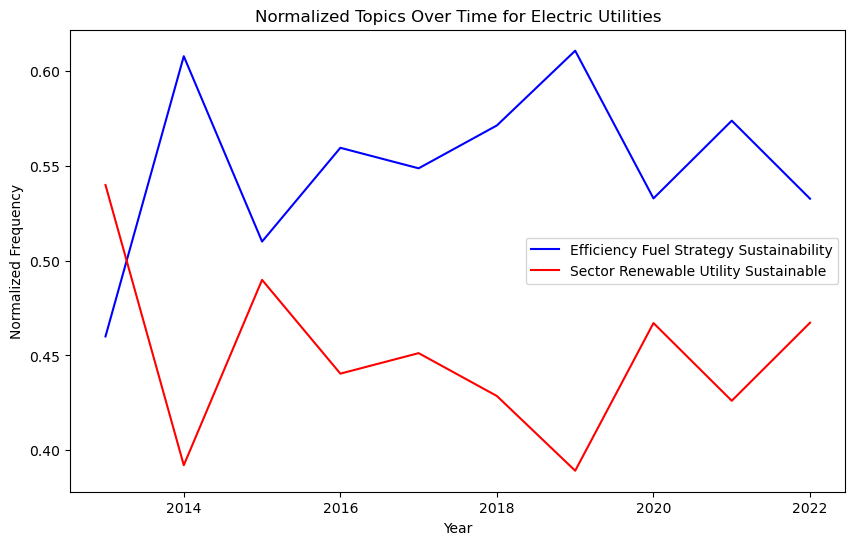

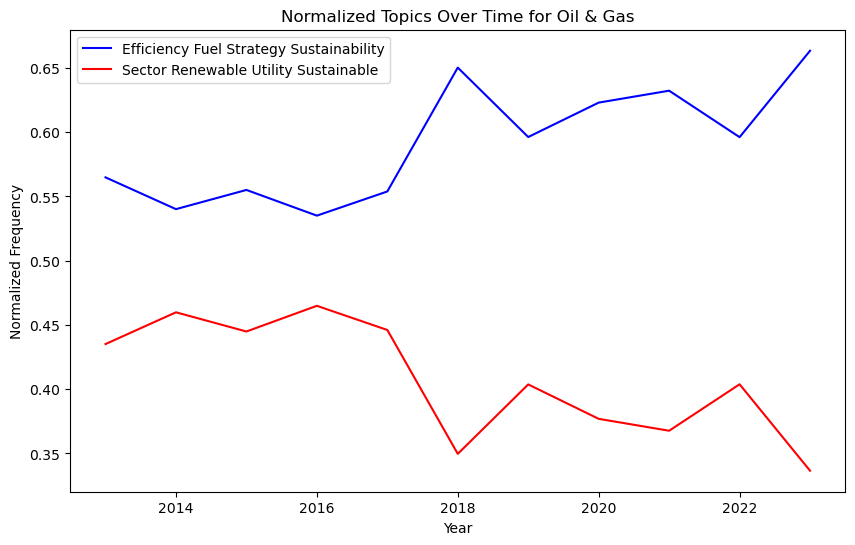

In [68]:
# Define new labels for the topics
topic_labels = {
    -1: 'Sector Renewable Utility Sustainable',
    0: 'Efficiency Fuel Strategy Sustainability'
}

# Function to recalculate, normalize, and plot topics over time for each sector
def recalculate_and_plot_normalized_topics_for_sector(df, sector_name="All Sectors"):
    # Filter the data for the sector
    if sector_name != "All Sectors":
        df_sector = df[df["Sector"] == sector_name]
        if df_sector.empty:
            print(f"No data available for sector: {sector_name}")
            return
        
        # Recalculate topics_over_time specifically for this sector
        topics_over_time_sector = topic_model.topics_over_time(
            df_sector["Document"].tolist(),  # Sector-specific documents
            df_sector["Year"].tolist(),      # Sector-specific years (timestamps)
            df_sector["Topic"].tolist()      # Sector-specific topics
        )
    else:
        # Recalculate topics_over_time for all sectors combined
        topics_over_time_sector = topic_model.topics_over_time(
            df["Document"].tolist(),  # All documents
            df["Year"].tolist(),      # All years
            df["Topic"].tolist()      # All topics
        )

    # Ensure there is data to plot for both topics
    df_topic_0 = topics_over_time_sector[topics_over_time_sector["Topic"] == 0]
    df_topic_neg1 = topics_over_time_sector[topics_over_time_sector["Topic"] == -1]

    # Combine the topics for normalization
    combined_df = pd.concat([df_topic_0, df_topic_neg1])

    # Normalize the frequencies by dividing each topic's frequency by the total frequency at each timestamp
    combined_df["Normalized Frequency"] = combined_df.groupby("Timestamp")["Frequency"].transform(lambda x: x / x.sum())

    # Separate the normalized data back into Topic 0 and Topic -1
    df_topic_0_normalized = combined_df[combined_df["Topic"] == 0]
    df_topic_neg1_normalized = combined_df[combined_df["Topic"] == -1]

    # Ensure there is data to plot after normalization
    if not df_topic_0_normalized.empty or not df_topic_neg1_normalized.empty:
        plt.figure(figsize=(10, 6))

        # Plot normalized Topic 0 with the new label
        if not df_topic_0_normalized.empty:
            plt.plot(df_topic_0_normalized["Timestamp"], df_topic_0_normalized["Normalized Frequency"], label=topic_labels[0], color='blue')

        # Plot normalized Topic -1 with the new label
        if not df_topic_neg1_normalized.empty:
            plt.plot(df_topic_neg1_normalized["Timestamp"], df_topic_neg1_normalized["Normalized Frequency"], label=topic_labels[-1], color='red')

        plt.xlabel("Year")
        plt.ylabel("Normalized Frequency")
        plt.title(f"Normalized Topics Over Time for {sector_name}")
        plt.legend()
        plt.show()
    else:
        print(f"No valid data for normalized Topics -1 and 0 for sector: {sector_name}")

# Plot for all sectors with normalization
recalculate_and_plot_normalized_topics_for_sector(df, sector_name="All Sectors")

# Plot for each specific sector with normalization
sectors_of_interest = ['Automobiles', 'Electric Utilities', 'Oil & Gas']
for sector in sectors_of_interest:
    recalculate_and_plot_normalized_topics_for_sector(df, sector_name=sector)


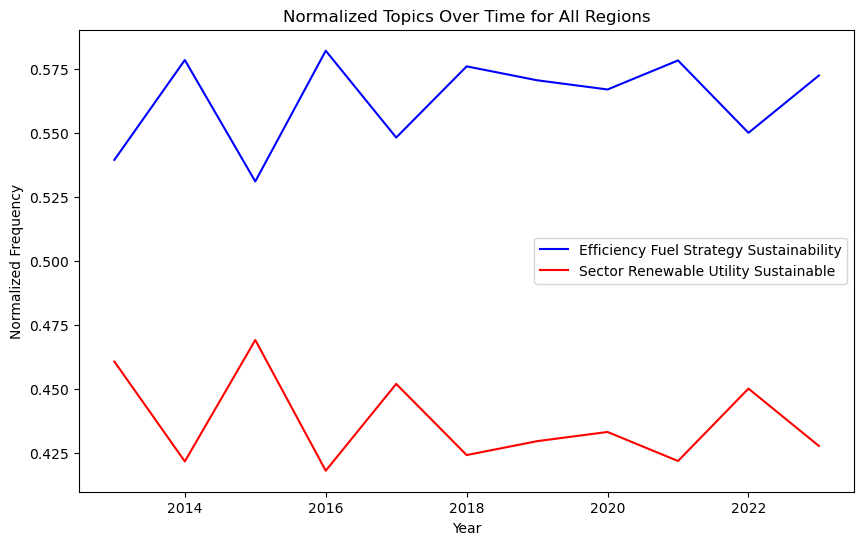

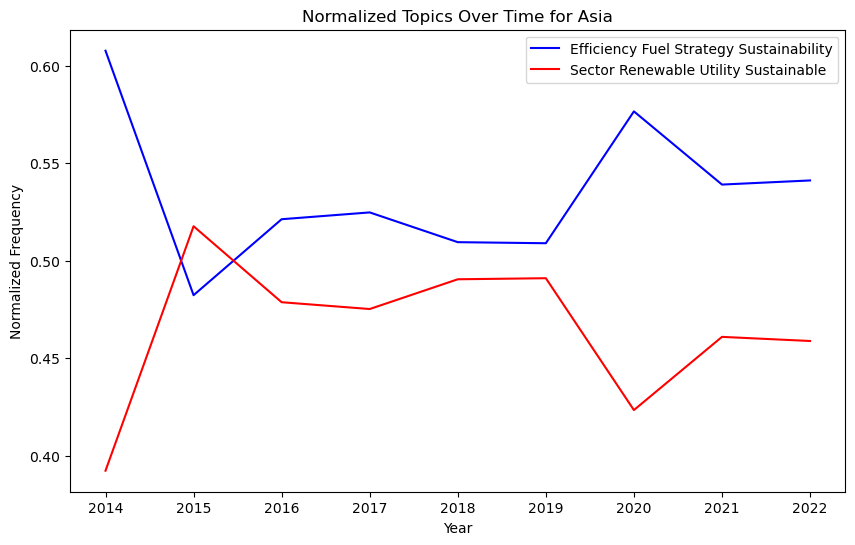

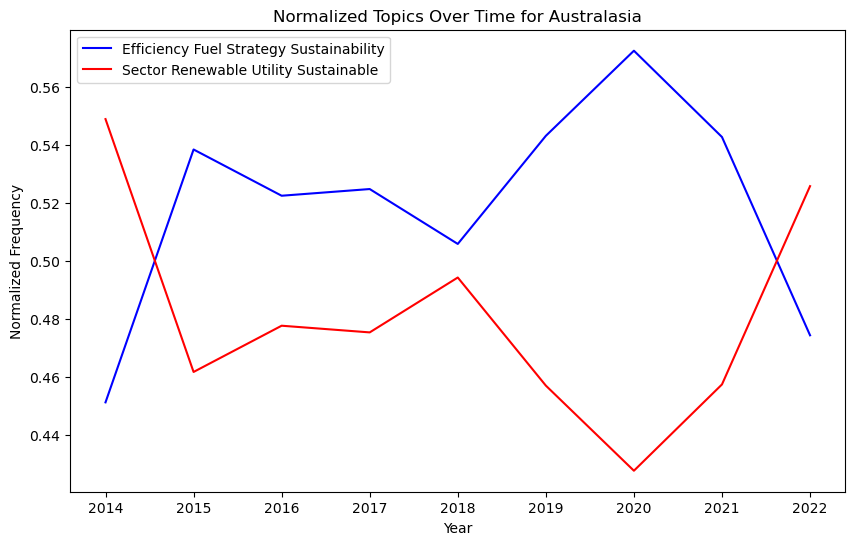

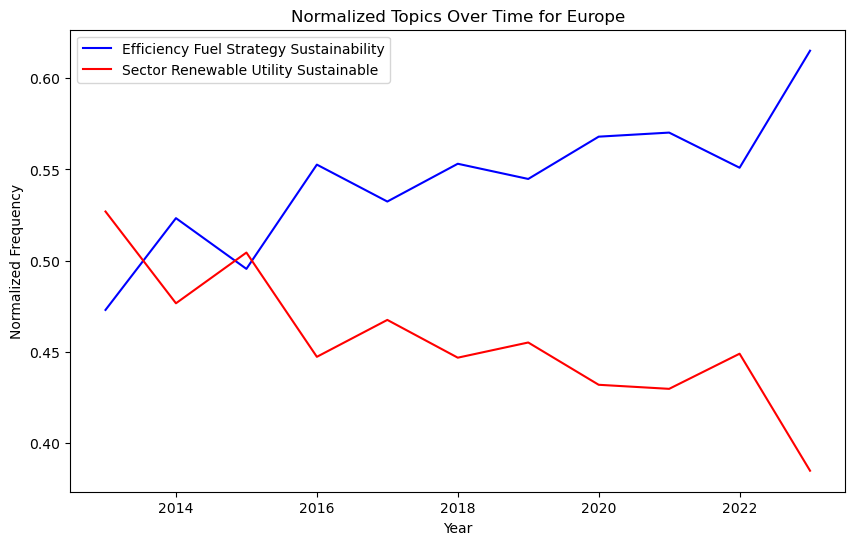

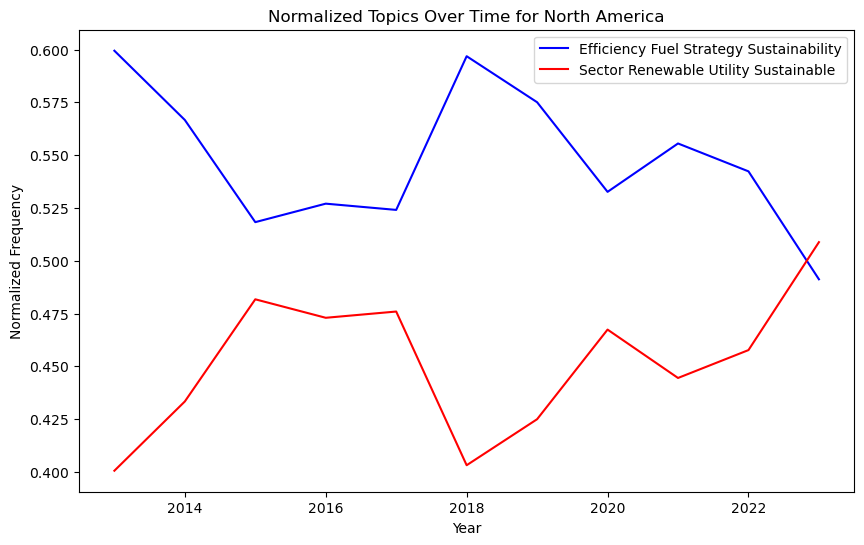

In [73]:
# Define new labels for the topics
topic_labels = {
    -1: 'Sector Renewable Utility Sustainable',
    0: 'Efficiency Fuel Strategy Sustainability'
}

# Function to recalculate, normalize, and plot topics over time for each region
def recalculate_and_plot_normalized_topics_for_region(cleaned_data_with_metadata, embeddings, region_name="All Regions"):
    # Filter the data for the region
    if region_name != "All Regions":
        region_indices = [i for i, entry in enumerate(cleaned_data_with_metadata) if entry['region'] == region_name]
        if len(region_indices) == 0:
            print(f"No data available for region: {region_name}")
            return
        
        # Filter data for the current region
        region_text_data = [cleaned_data_with_metadata[i]['text'] for i in region_indices]
        region_embeddings = embeddings[region_indices]
        region_years = [cleaned_data_with_metadata[i]['year'] for i in region_indices]

        # Assign topics dynamically using the BERTopic model
        region_topics, _ = topic_model.transform(region_text_data, embeddings=region_embeddings)

        # Recalculate topics_over_time for this region
        topics_over_time_region = topic_model.topics_over_time(
            region_text_data,  # Region-specific documents
            region_years,      # Region-specific years (timestamps)
            region_topics      # Region-specific topics
        )
    else:
        # If "All Regions", use all data
        region_text_data = [entry['text'] for entry in cleaned_data_with_metadata]
        region_embeddings = embeddings
        region_years = [entry['year'] for entry in cleaned_data_with_metadata]

        # Assign topics for all regions combined
        region_topics, _ = topic_model.transform(region_text_data, embeddings=region_embeddings)

        topics_over_time_region = topic_model.topics_over_time(
            region_text_data,  # All documents
            region_years,      # All years
            region_topics      # All topics
        )

    # Ensure there is data to plot for both topics
    df_topic_0 = topics_over_time_region[topics_over_time_region["Topic"] == 0]
    df_topic_neg1 = topics_over_time_region[topics_over_time_region["Topic"] == -1]

    # Combine the topics for normalization
    combined_df = pd.concat([df_topic_0, df_topic_neg1])

    # Normalize the frequencies by dividing each topic's frequency by the total frequency at each timestamp
    combined_df["Normalized Frequency"] = combined_df.groupby("Timestamp")["Frequency"].transform(lambda x: x / x.sum())

    # Separate the normalized data back into Topic 0 and Topic -1
    df_topic_0_normalized = combined_df[combined_df["Topic"] == 0]
    df_topic_neg1_normalized = combined_df[combined_df["Topic"] == -1]

    # Ensure there is data to plot after normalization
    if not df_topic_0_normalized.empty or not df_topic_neg1_normalized.empty:
        plt.figure(figsize=(10, 6))

        # Plot normalized Topic 0 with the new label
        if not df_topic_0_normalized.empty:
            plt.plot(df_topic_0_normalized["Timestamp"], df_topic_0_normalized["Normalized Frequency"], label=topic_labels[0], color='blue')

        # Plot normalized Topic -1 with the new label
        if not df_topic_neg1_normalized.empty:
            plt.plot(df_topic_neg1_normalized["Timestamp"], df_topic_neg1_normalized["Normalized Frequency"], label=topic_labels[-1], color='red')

        plt.xlabel("Year")
        plt.ylabel("Normalized Frequency")
        plt.title(f"Normalized Topics Over Time for {region_name}")
        plt.legend()
        plt.show()
    else:
        print(f"No valid data for normalized Topics -1 and 0 for region: {region_name}")

# Plot for all regions with normalization
recalculate_and_plot_normalized_topics_for_region(cleaned_data_with_metadata, embeddings, region_name="All Regions")

# Plot for each specific region with normalization
regions_of_interest = ['Asia', 'Australasia', 'Europe', 'North America']
for region in regions_of_interest:
    recalculate_and_plot_normalized_topics_for_region(cleaned_data_with_metadata, embeddings, region_name=region)
